# 머신러닝 파이프라인 소개

- Part1: Exploratory Data Analysis(EDA)

독립변수(feature) 분석 + 여러개의 독립변수(feature)들 간의 관계 분석

- Part2: Feature Engineering and Data Cleaning

독립변수(feature)를 가공해서 새로운 독립변수(feature) 생성 + 필요 없는 feature 제거 + feature를 모델에 맞도록 변형

- Part3: Predictive Modeling

모델 학습 + Cross Validation + 앙상블 + Important Features 확인

# 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# Part1: Exploratory Data Analysis(EDA)

In [2]:
data = pd.read_csv('../data/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# checkinc for total null values

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age, Cabin, Embarked에 NaN 값이 있다는 것을 알았음.

- 이 값을 어떻게 채울지 생각 해야됨

## How many Survived?

- 먼저 Target label이 어떤 분포를 가지고 있는지 확인

- 이에 따라서 어떤 평가지표를 사용할지, 정할 수 있음.

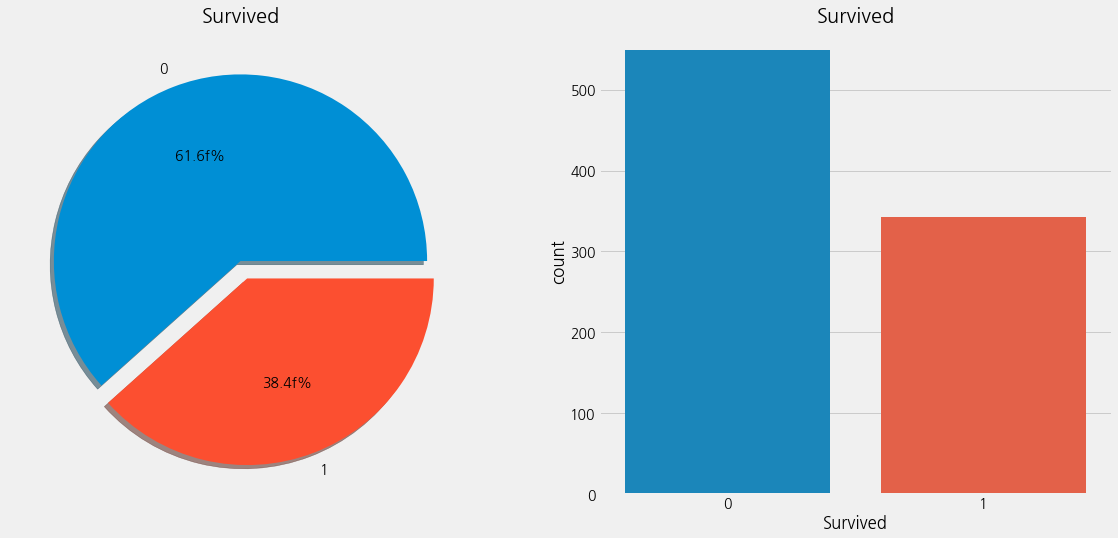

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1ff%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- 사고로 인해 많은 사람들이 죽었다는 것을 알 수 있음.

- 훈련 데이터셋에 있는 891명중 350명만이 살았다는 것을 알 수 있고, 그 비율이 38.4%에 불과함.

- 데이터를 분석해서, 생존한 사람과 생존하지 않은 사람의 차이를 알아야됨.

## Types Of Features

어떤 종류의 feature가 있는지 확인해보자.

- Categorical Features

말 그대로, 그룹으로 나눌 수 있는 데이터를 말함. 예시로, 성별이 있음.

그리고 데이터에 순서가 없는 범주형 데이터를 명목형 데이터라고 부름. 여기서는 Sex, Embarked가 이에 해당.

반대로 데이터에 순서가 있는 범주형 데이터를 순위형 데이터라고 부름. 여기서는 PClass가 이에 해당.

- Continuous Features

말 그대로, 최소값 또는 최댓값 사이의 값을 연속적으로 가지고 있는 데이터를 말함.

여기서는 Age가 이에 해당함.

## Analysing The Features

### Sex -> Categorical Feature

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

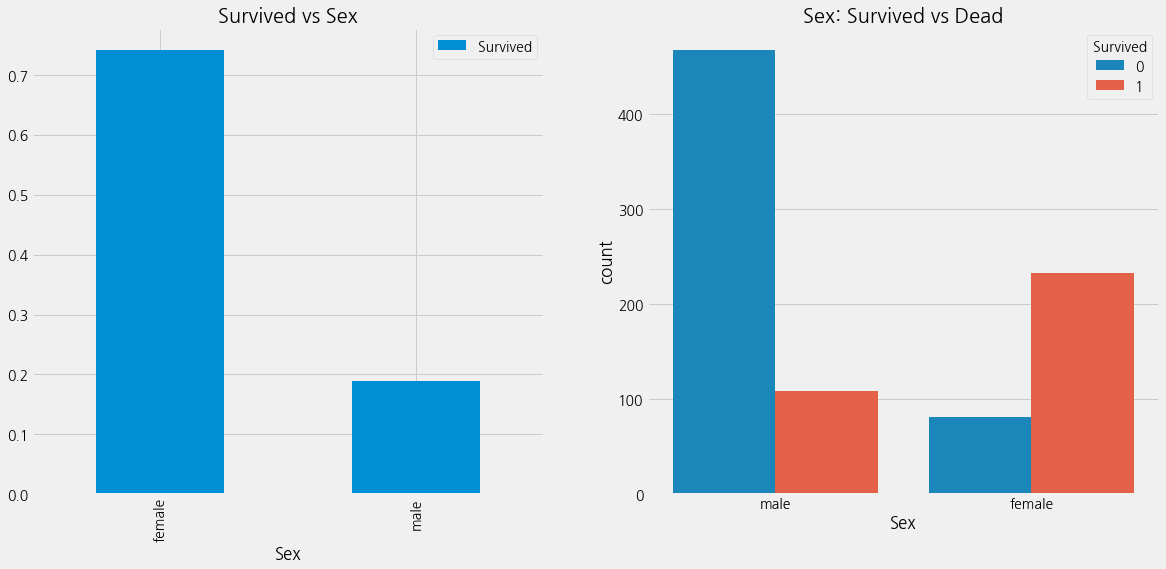

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 남성이 여성보다 많이 탑승했다는 것을 알 수 있음.

- 하지만 생존률은 남성보다 여성이 높음.

- 여성의 생존률을 75%이지만, 남성 같은 경우에는 18%~19%임.

- Sex는 중요한 feature 로 보임.

### Pclass -> Ordinal Feature

In [11]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


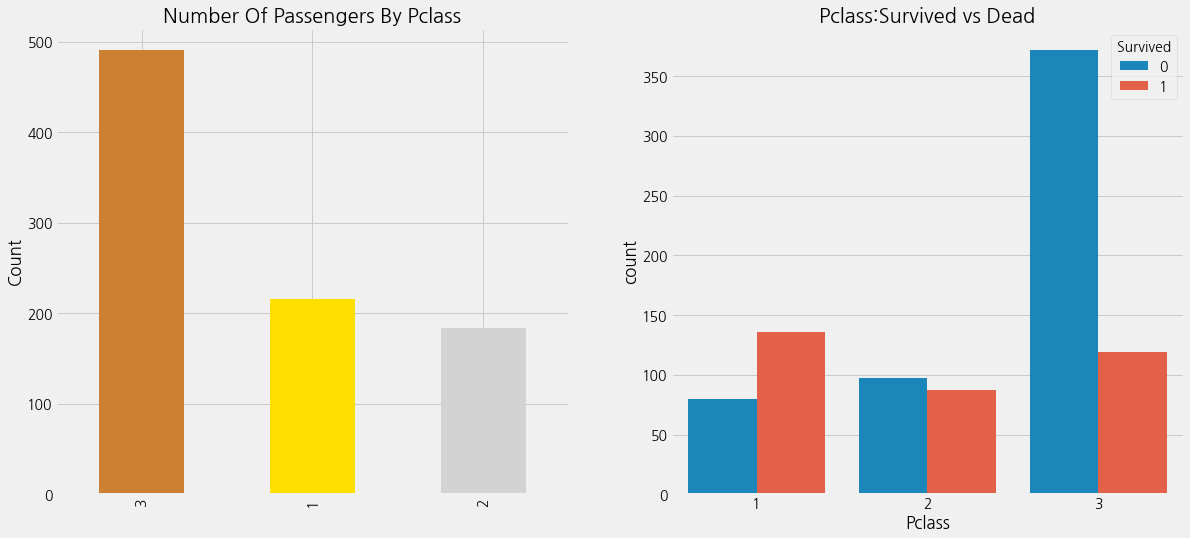

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- 돈으로 모든 것을 살 수 없다고 하지만, 이 결과를 보면 Pclass 1에 탑승하고 있는 손님이 생존률이 높다는 것을 알 수 있음.

- Pclass 3에 탑승하고 있는 손님이 압도적으로 많지만, 생존률은 25%에 불과함.

- 그에 반면, Pclass 1은 63%, Pclass 2는 48%라는 것을 알 수 있음.

- 그 다음에는 Sex 와 Pclass를 가지고 생존률에 대해서 알아보자.

In [13]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

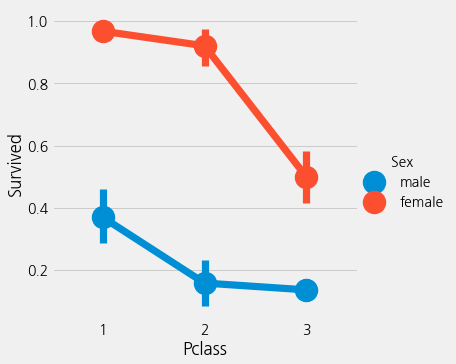

In [14]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

- seaborn의 FactorPlot를 사용하면, 범주형 데이터에 대한 관계를 쉽게 볼 수 있음.

- 위의 그래프를 통해서, Pclass 1에 탑승한 여성 같은 경우에는 95%~96% 정도의 생존률을 보이고 있고, 94명중 3명 밖에 죽지 않았다는 것을 알 수 있음.

- Pclass에 관계없이 구조하는 동안 여성이 최우선 순위를 가졌음을 알 수 있음. WHY? Pclass 1의 남성은 상대적으로 생존률이 높지만, 다른 것에 비해서는 생존률이 낮기 때문임.

- Pclass가 중요한 feature 처럼 보일 수 있음.

### Age -> Continous Feature

In [15]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


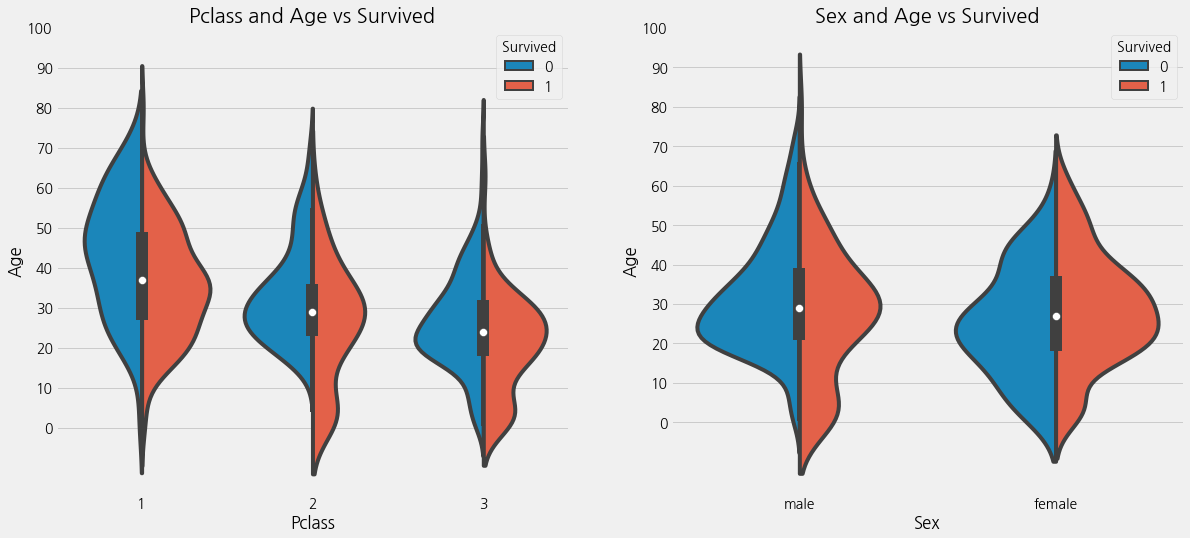

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- Pclass가 3으로 갈수록 아이들의 수가 증가하고 있다는 것을 알 수 있고, 10살 아래의 아이의 생존률이 높다는 것 또한 알수 있음. 따라서 Pclass와 10 아래의 아이들은 관계가 없어 보임.

- Pclass1의 20-50세 탑승객은 생존률이 높음. 여성의 경우는 더 높음.

- 남성의 경우 나이가 많으면 많을수록 생존률이 감소함

- Age 에는 177개의 결측치가 존재함. 이를 채우기 위해서 평균 나이를 이용할 수 있음.

- 하지만, 다양한 연령대의 사람이 많아서, 전체 데이터셋에 대한 평균 나이를 그대로 이용하는 것은 어려워 보임.

- 데이터를 좀더 살펴보면, Name Feature에 Mr 또는 Mrs 같은 title이 있다는 것을 알 수 있음.

- 이러한 title을 가지고 승객들을 그룹핑하고, 이를 토대로 평균 값을 이용한다면, 전체 데이터셋에 대한 평균 나이를 그대로 이용하는 것보다 좋은 방법처럼 보임.

In [20]:
# lets extract the Salutations
data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [22]:
#Checking the Initials with the Sex
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [23]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [24]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [26]:
# Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [27]:
data.Age.isnull().any() # so no null values left finally

False

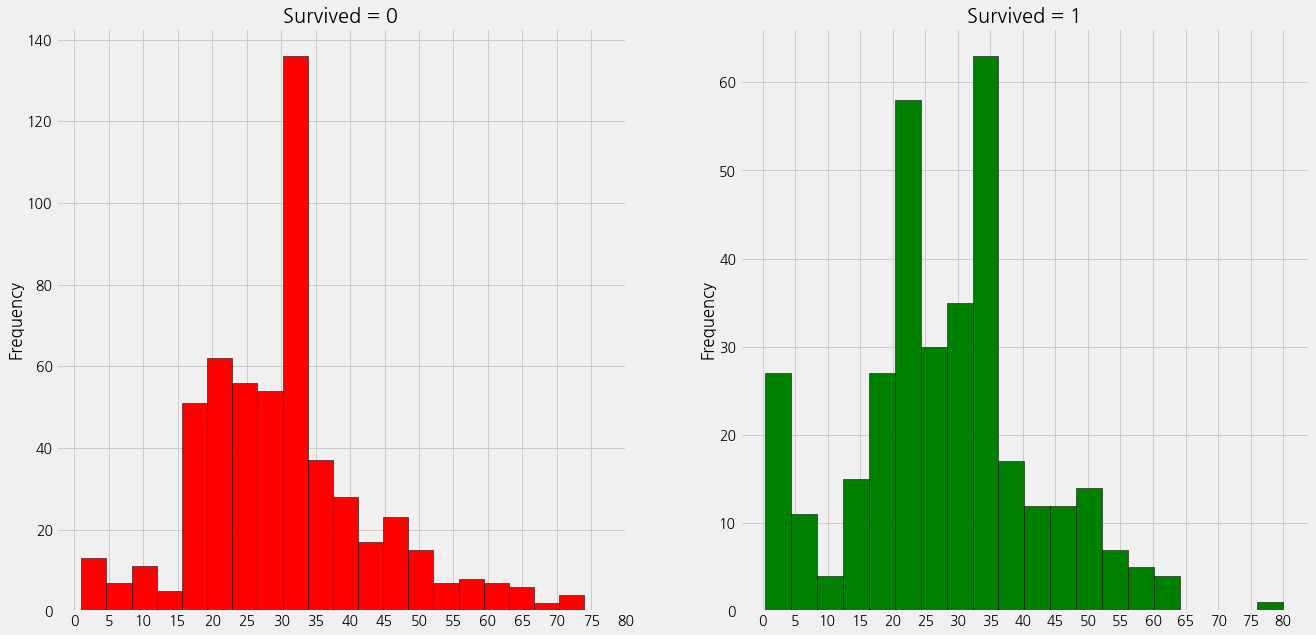

In [28]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
ax[0].set_xticks(range(0, 85, 5))

data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(range(0, 85, 5))

plt.show()

- 5살 아래의 애기들은 생존률이 높다는 것을 알 수 있음. (여성, 아동 우선 정책)

- 가장 나이 많은 승객은 생존했다는 것을 알 수 있음.

- 최대 사망자 수는 30-40대이지만, 최대 생존자 수도 30-40대 라는 것을 알 수 있음.

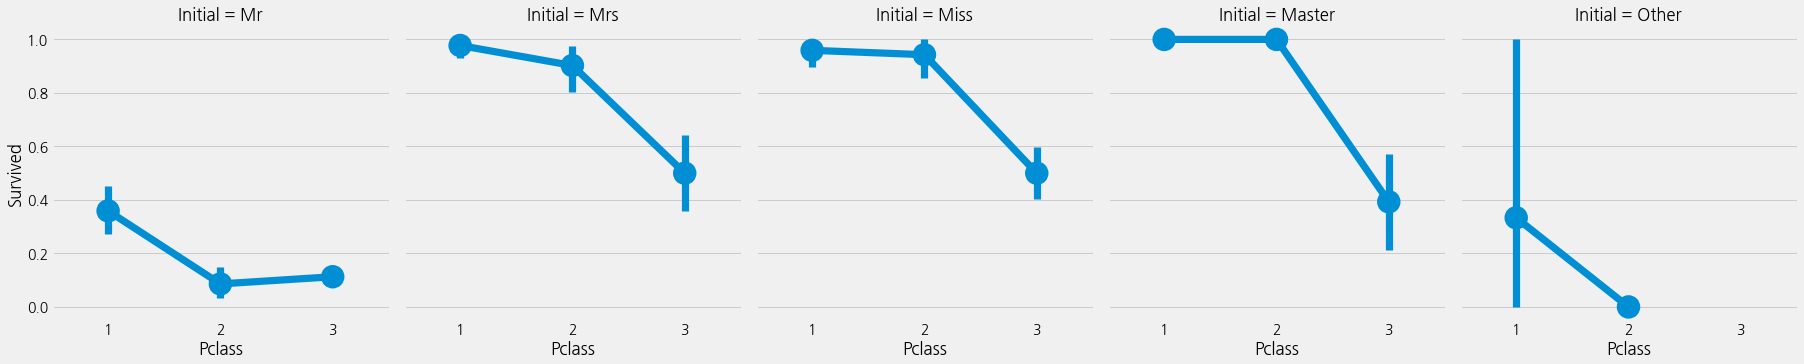

In [29]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

- 여성, 아동 우선 정책은 클래스와 상관이 없다는 것을 알 수 있음.

### Embarked -> Categorical Value

In [30]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

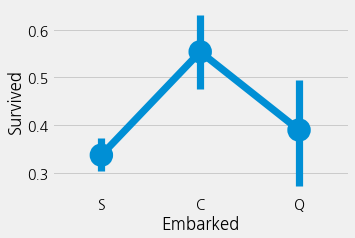

In [32]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

- 항구 C가 생존률이 가장 높고, 항구 S가 생존률이 가장 낮다는 것을 알 수 있음.

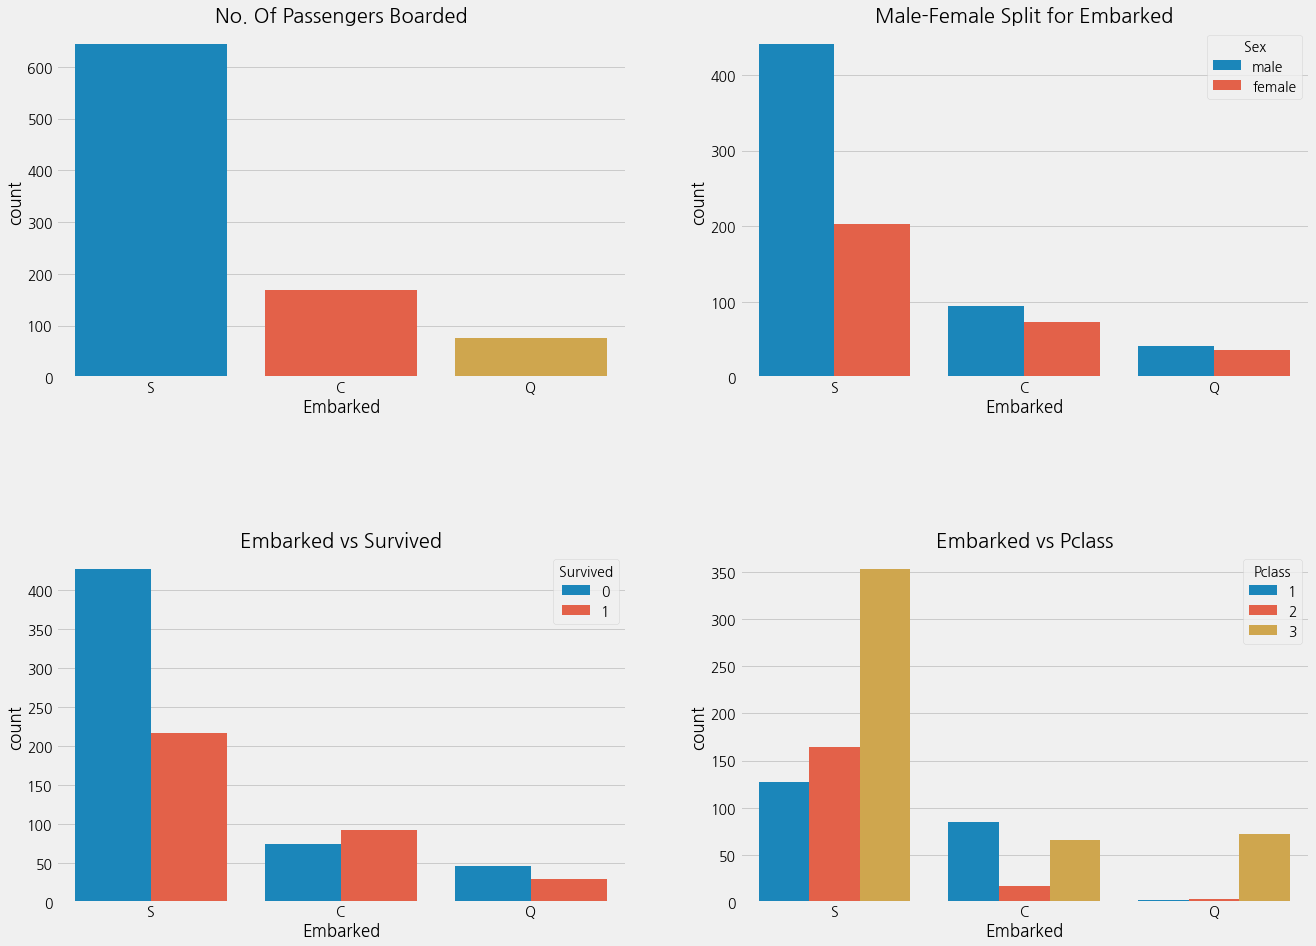

In [33]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 항구 S에서 가장 많이 탑승했고, 대다수가 Pclass 3 탑승객임.

- 항구 C의 탑승객은 생존률이 좋은데, 돈이 많은 사람들이 탑승해서일 가능성이 높음.

- 항구 S에서도 돈이 많은 사람들이 많았지만, Pclass 3 탑승객이 많이 타서 생존률이 낮음. Pclass 3 탑승객은 19% 밖에 생존하지 못했기 때문임.

- 항구 Q는 대부분 승객이 Pclass 3임.

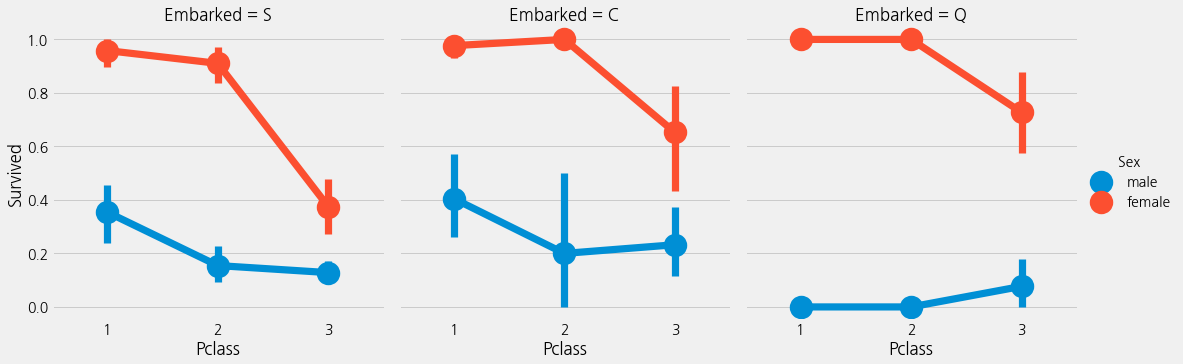

In [35]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

- Pclass1 Pclass2의 여성 생존률은 거의 1임.

- 항구 S의 경우 Pclass 3의 탑승객은 생존률이 낮음. 남성 뿐만 아니라 여성 또한 생존률이 낮음. (재력의 여부가 생존률하고 관계가 있어 보임.)

- 항구 Q의 경우 Pclass에 상관없이 남성의 생존률은 매우 낮음.

In [37]:
# 항구 S에서 탑승한 손님이 많으니, NaN값은 항구 S로 채움
data['Embarked'].fillna('S', inplace=True)

In [38]:
data.Embarked.isnull().any()

False

### SibSip -> Discrete Feature

- SibSip는 개인인지 가족과 함께 왔는지를 나타냄

- Sibling은 형제, 자매, 의봇형재, 의봇자매를 의미함.

- Spouse은 남편, 아내를 의미함.

In [39]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


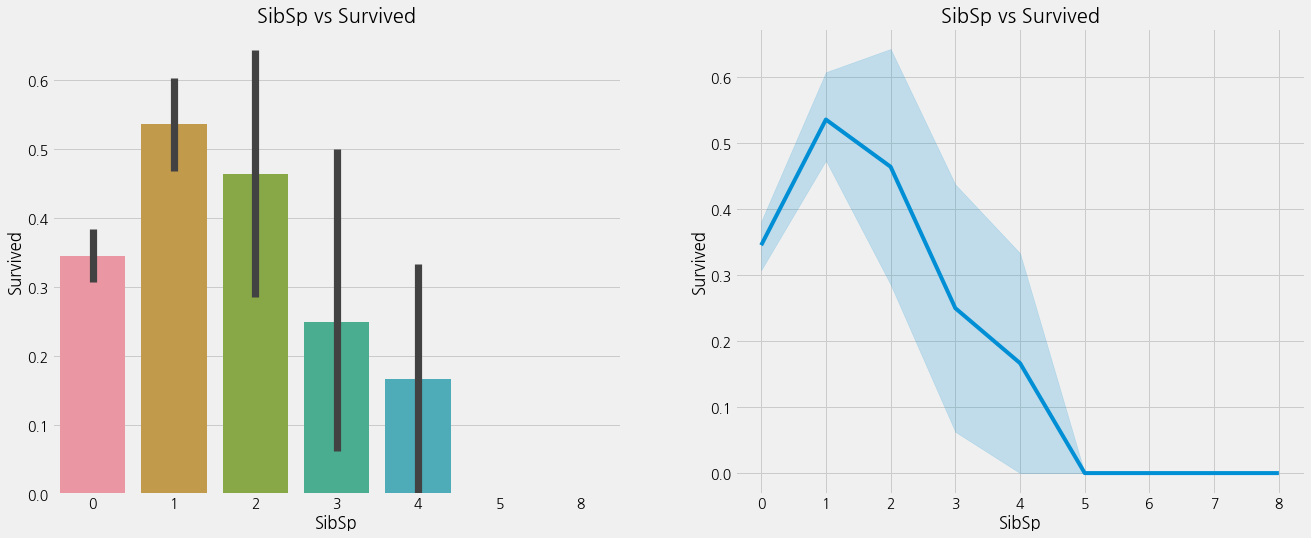

In [67]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.lineplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()


In [69]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 혼자 탑승할 경우 생존율이 34.5%에 불과함.

- 1~2명 정도의 동반자가 있다면 생존율이 대략 50%임. 하지만 동반자가 많아지면 많아질수록 생존율이 떨어진다는 것을 알 수 있음.

- 가족이 있다면, 자기 자신을 구하는 대신 가족을 구하기 때문에 본인의 생존율이 떨어진다는 것을 볼 수 있음.

- 5~8명의 동반자가 있는 경우에는 생존율이 0%임. 그 이유는 ??? Pclass 3의 승객이었다는 것을 알 수 있음. 이를 통해서 Pclass 3에 타고 있는 핵가족이 죽었음을 의미함.

### Parch

In [70]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


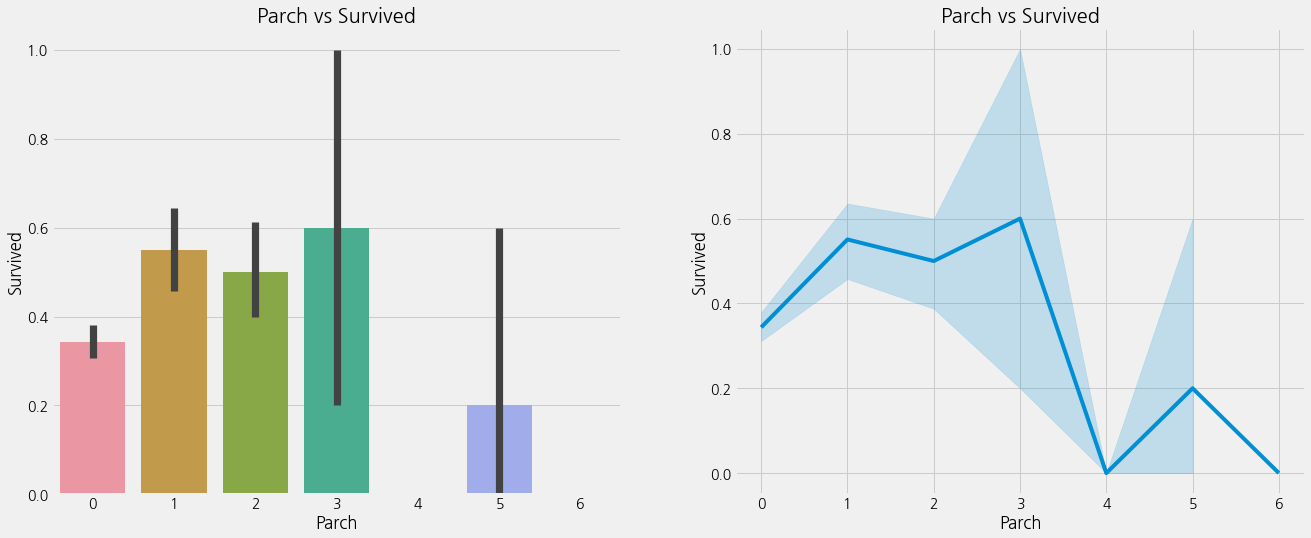

In [74]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.lineplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

- 부모님과 함께 탑승한 사람들의 생존률이 좋지만, 이것도 1~3명의 경우에만...

- 그 것을 넘어가는 경우에는 혼자 있을 확률보다 생존율이 낮음.

### Fare -> Continuous Feature

In [75]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


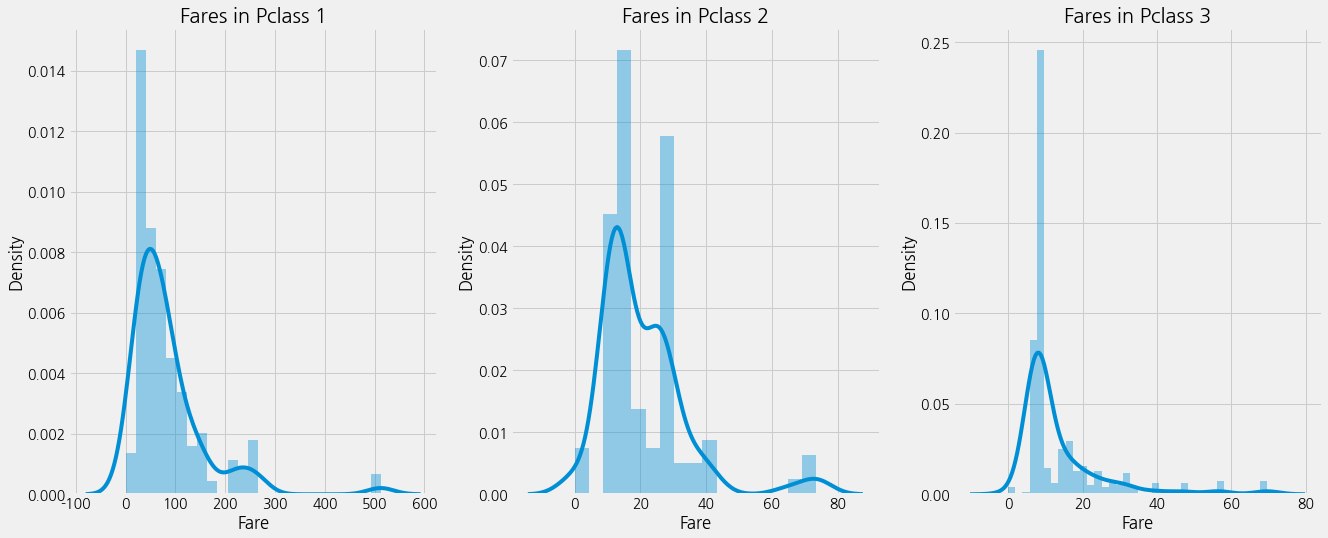

In [76]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

- Pclass 1의 경우, 요금이 다른 Pclass에 비해 크다는 것을 알 수 있음. 큰 부분을 제외하고 본다면, 정규분포이지만, 큰 부분도 포함한다면 비대칭 분포를 띄고 있음.

- Fare 은 continuous이기 때문에 discreate로 변환할 수 있음.

- information loss가 발생할 수 있지만, 때에 따러서는 도움이 됨.

### Observations in a Nutshell for all features

- Sex

여성이 남성보다 생존율이 높음.

- Pclass

1등급 승객이 생존율이 높음. 3등급 승객은 생존율이 낮음. 그리고 여성의 경우 Pclass의 상관없이 생존율이 높음.

- Age

5~10 정도의 어린아이의 생존율이 높음. 15~35 사이의 승객이 가장 많이 사망함. 해당 나이대를 가진 사람이 배를 많이 탔다는 것 또한 알 수 있음.

- Embarked

항구 C에서 탑승한 손님들이 생존율이 높음. 항구 C에서 탑승한 대다수의 승객이 1등급 손님이라서 그럴 가능성이 높음. 반면 항구 Q에서 탑승한 손님들은 3등급 손님이라서 생존율이 낮음.

- Parch+SibSp

1~2명의 형제, 자매, 배우자, 또는 1~3명의 부모님하고 같이 탑승한 손님의 경우 생존율이 높음. 반면 혼자기어나 대가족의 경우 생존율이 낮음.

### Corrleation Between The Features

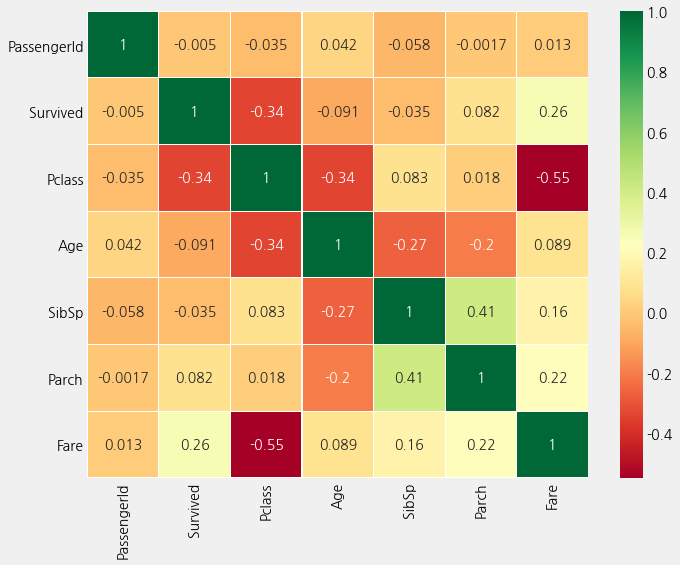

In [80]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- 양의 상관 관계

A의 증가가 B의 증가로 이어지는 경우 양의 상관 관계. 1일 경우 완전 일치를 의미함.

- 음의 상관 관계

A의 감소가 B의 감소로 이어지는 경우 음의 상관 관계. -1일 경우 완전 일치를 의미함.

상관관계가 크면 클수록, 그것들에서 뽑을 수 있는 정보가 거의 동일하다는 것을 의미함.

따라서 모델의 무게를 줄이기 위해서 상관관계가 매우 큰 경우에는 featue selection을 통해서 제거할 필요가 있음.

# Part2: Feature Engineering and Data Cleaning

- Feature Engineering를 통해서 제거할 feature는 제거하고, 새로 추가할 feature는 추가함.

## Age_band

- 연속형 변수를 사용하는 것은 머신러닝 모델 학습에 좋지 않음. WHY? 범위가 넓기 때문에

- 따라서 binning을 통해서 그룹핑을하고, 이산형 변수 형태로 만들어줘야함.

In [81]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band'] = 3
data.loc[(data['Age']>64), 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [82]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


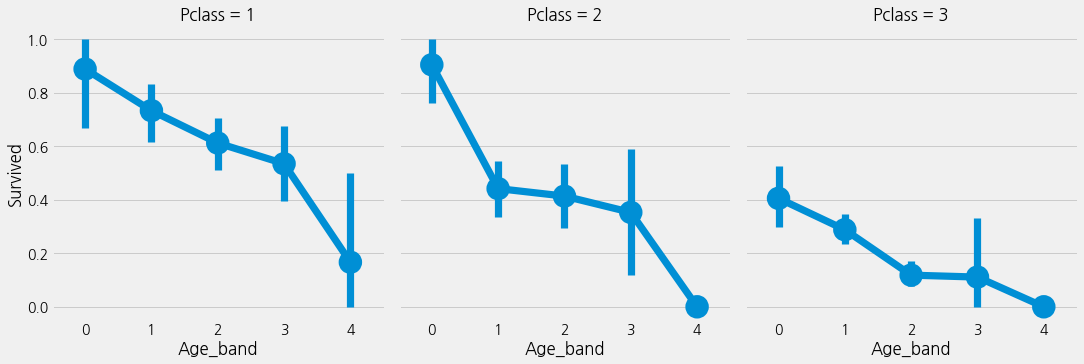

In [83]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

## Family_Size and Alone

- Parch + SibSp를 이용해서 가족 구성원수와 혼자 유무를 가진 새로운 feature를 만들 수 있음.

- 이를 통해서 생존율이 승객의 가족 규모와 관련이 있는지 파악할 수 있음.

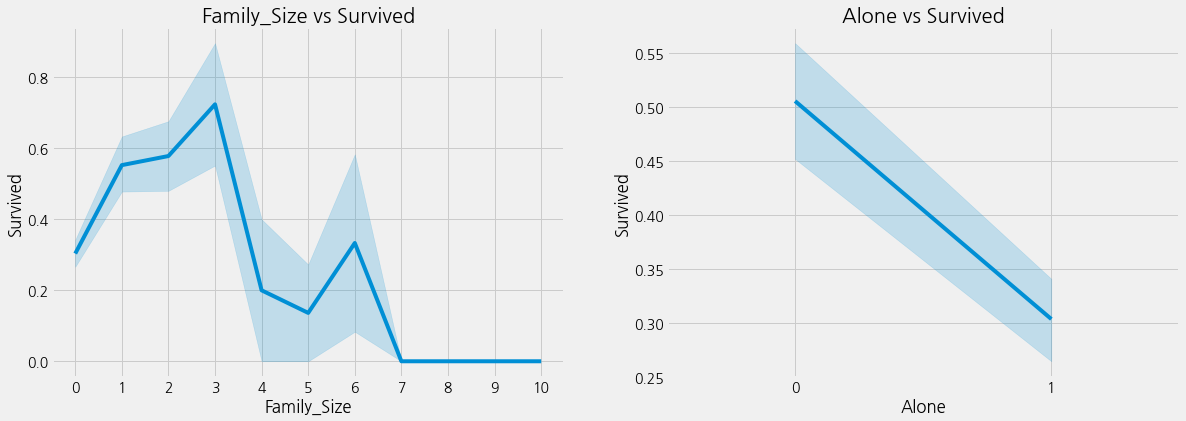

In [91]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

f, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.lineplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_xticks(range(0, 11))
ax[0].set_title('Family_Size vs Survived')

sns.lineplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_xticks(range(0, 2))
ax[1].set_xlim([-0.5, 1.5])
ax[1].set_title('Alone vs Survived')
plt.show()

- Family_Size = 0은 혼자임을 뜻함. 혼자 있는 사람은 생존율이 낮음.

- Family_Size > 4 인 경우에도 생존율이 낮음.

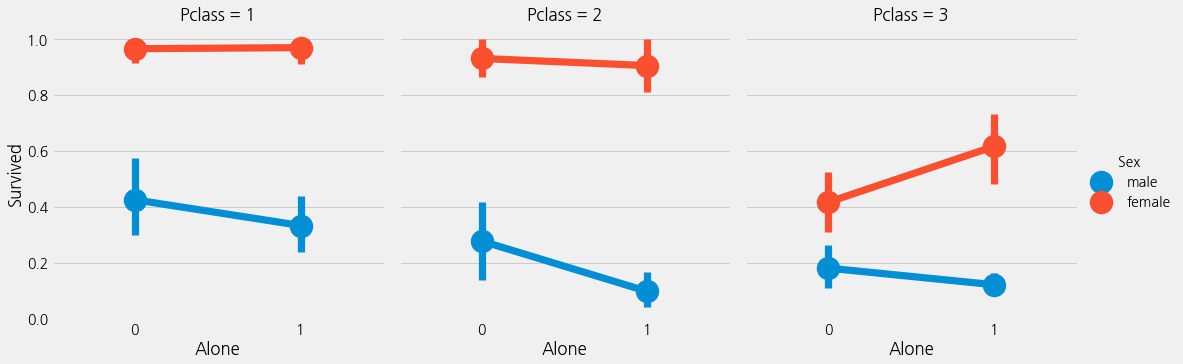

In [93]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

- 가족이 있는 여성보다 혼자 있는 여성의 생존율이 높은 Pclass3를 제외하고, 혼자 있는 것은 성별이나 Pclass에 관계없이 생존율이 낮다는 것을 알 수 있음.

## Fare_Range

- Fare 또한 연속형 변수이기 떄문에 binning을 통해서 범주형 변수로 바꿔야됨. (이 경우, 순위형 변수로)

- pd.qcut를 이용하면 동일한 개수로 그룹핑을 할 수 있음.

In [94]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- 비싼 요금을 낸 사람일 낼수록 생존율이 증가한다는 것을 알 수 있음.

In [96]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <=31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

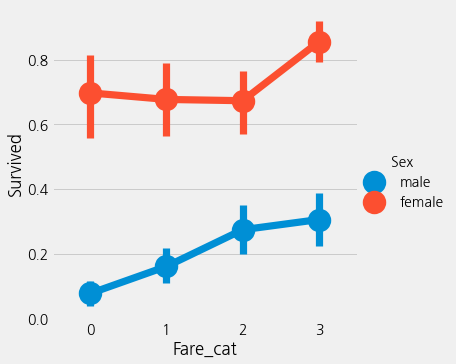

In [97]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

## Converting String Values into Numeric

- 머신러닝 모델은 문자열을 학습할 수 없음. 따라서 실수값으로 바꿔줘야 됨.

In [98]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

## Dropping UnNeeded Features

- Name

범주형 데이터로 변환할 수 없으니 버림.

- Age

Age_band 라는 새로운 변수를 만들어서 사용할 것이기 때문에 버림

- Ticket

범주형 데이터로 바꾸기 위해서는 아이디어가 필요함. 여기서는 버림.

- Fare

Fare_cat 이라는 새로운 변수를 만들어서 사용할 것이기 때문에 버림

- Cabin

여러개의 범주를 가지고 있고, NaN 값이 많아서 사용하기 힘듬 따라서 버림

- Fare_Range

fare_cat 이라는 새로운 변수를 만들어서 사용하기 때문에 버림.

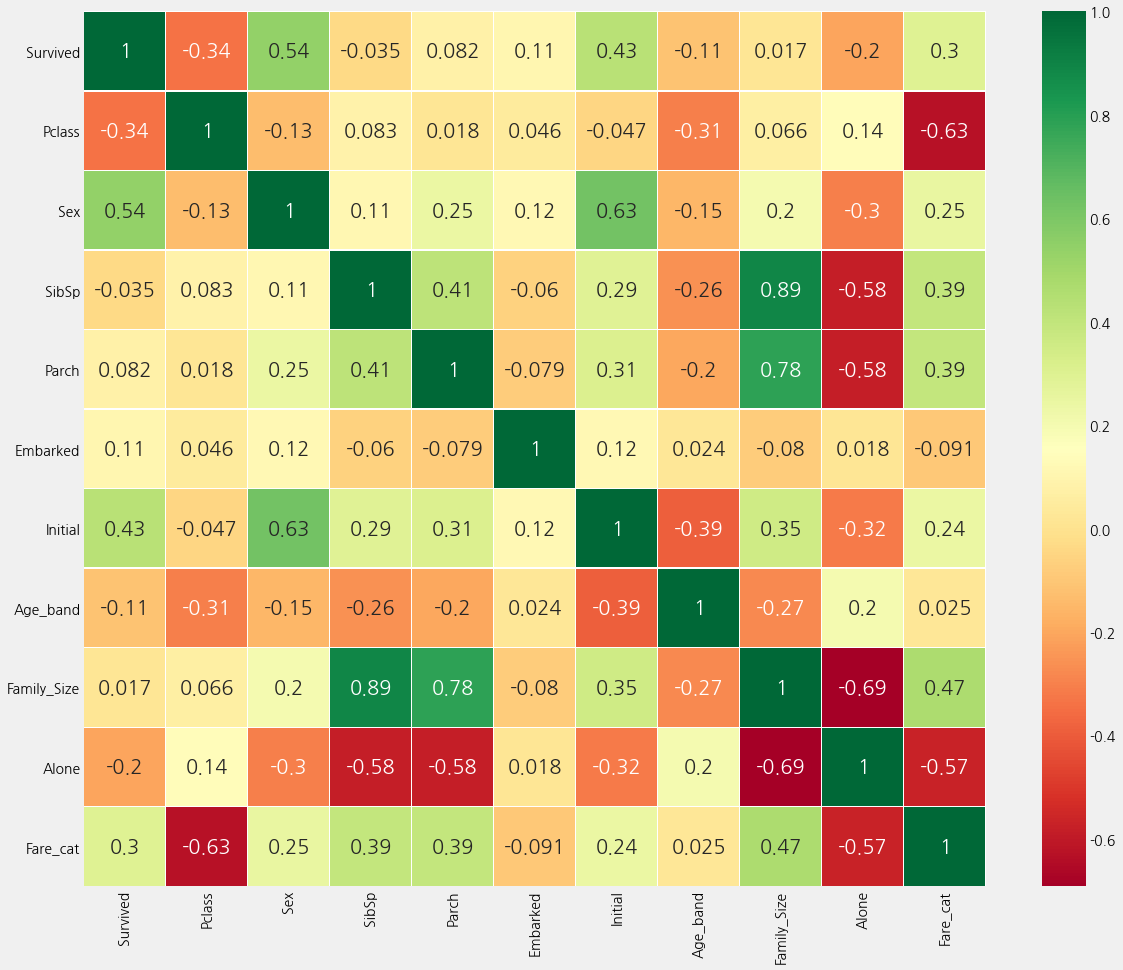

In [99]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3: Predictive Modeling

여기서는 6가지의 머신런이 모델을 사용해서 예측을 해볼 것임.

- Logistic Regression

- Support Vector Machines(Linear and radial)

- Random Forest

- K-Nearest Neighbours

- Navie Bayes

- Decision Tree

In [100]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [101]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

## Radial Support Vector Machines(rbf-SVM)

In [149]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


## Linear Support Vector Machine(linear-SVM)

In [104]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


## Logistic Regression

In [135]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


## Decision Tree

In [107]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


## K-Nearest Neightbours(KNN)

In [108]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.832089552238806


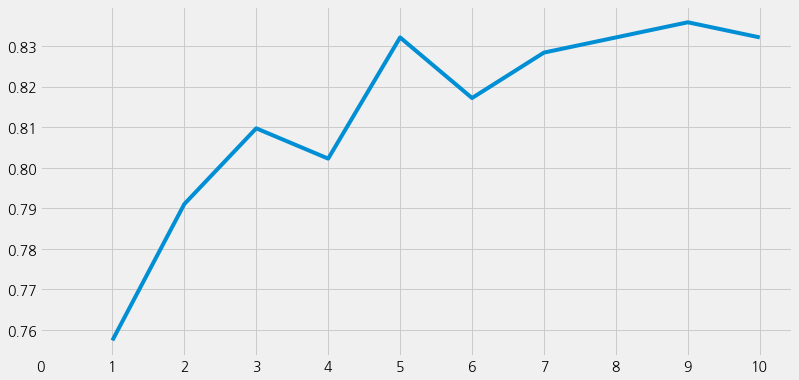

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [109]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

## Gaussian Naive Bayes

In [110]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NavieBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NavieBayes is 0.8134328358208955


## Random Forests

In [111]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forest is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forest is 0.8134328358208955


## Cross Validation

- 모델의 정확성이 모델이 좋다는 것을 의미하지 않음.

- 훈련셋, 테스트셋, 모델의 하이퍼파라미터가 변경됨에 따라 모델의 정확성은 항상 변하기 때문. 이를 model variance라고 부름.

- 이를 극복하기 위해서 교차 검증을 이용함.

In [114]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=42, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.794594,0.054656
Radial Svm,0.826017,0.041586
Logistic Regression,0.802434,0.045404
KNN,0.817079,0.037173
Decision Tree,0.802434,0.045681
Naive Bayes,0.801348,0.030979
Random Forest,0.801336,0.039946


<AxesSubplot:>

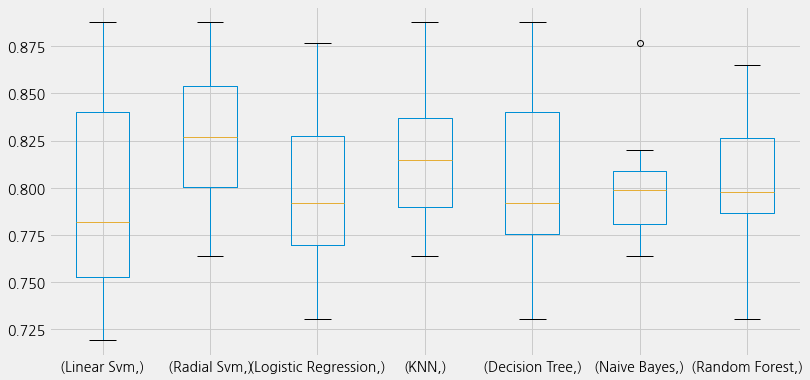

In [115]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

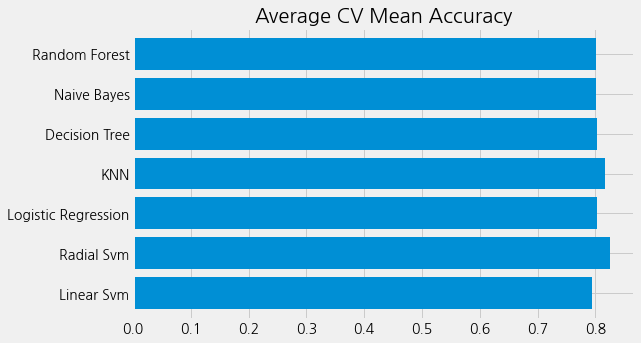

In [117]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix

- 불균형으로 인해 모델의 정확도가 이상할 수도 있음.

- 이 경우, Confusion Matrix를 통해서 어떤 부분을 잘 못 예측했는지 파악할 수 있음.

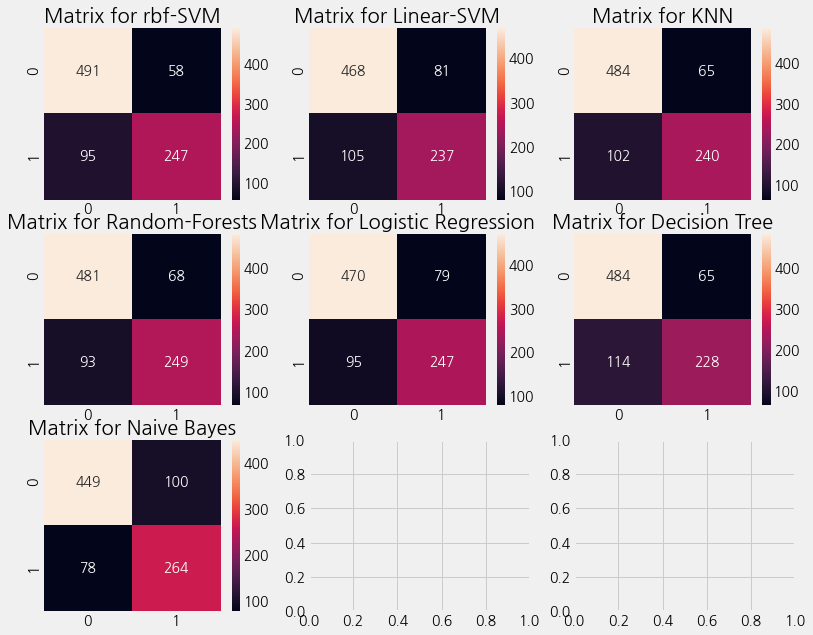

In [118]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

- Figure 1에 대해서

- 정확하게 예측한 경우는 평균적으로 82.2 % 라는 것을 알 수 있음.

- 58명이 죽었는데 생존했다고 잘못 분류했고, 95명이 살았는데 죽었다고 잘못 분류함.

## Hyper-Parameters Tuning

- 머신러닝 모델 학습은 블랙박스와 같음. 이러한 블랙박스를 조절하기 위한 몇개의 하이퍼 파라미터가 존재.

- 하이퍼 파라미터를 조절함으로써 모델의 세부적인 디테일을 조절할 수 있음.

In [123]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)
{'C': 0.4, 'gamma': 0.3, 'kernel': 'rbf'}


In [124]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


## Ensembling

- 앙상블은 모델의 정확성이나 성능을 높이는데 좋은 방법

- 심플한 모델을 묶어서 하나의 강력한 모델을 만드는 방법

- Voting Classifier, Bagging, Boosting등이 이에 해당

### Voting Classifier

- 머신모델별로 평균을 취해서 모델의 예측을 선택함.

In [125]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


### Bagging

- 높은 분산을 가진 모델에 적합. 데이터 샘플 선택해서 모델을 학습시키고, 그것에 평균을 내서 분산을 낮춤.

In [126]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


In [127]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting

- 전체 데이터셋에 대해서 먼저 학습하고, 그 결과로 나온 에러를 가지고 다시 재학습해서, 모델의 성능을 높이는 방법

In [128]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [129]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [130]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

[19:22:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [132]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


## Confusion Matrix for the Best Model

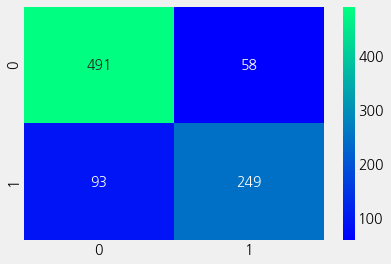

In [133]:
ada=AdaBoostClassifier(n_estimators=100,random_state=42,learning_rate=0.1)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

[19:36:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


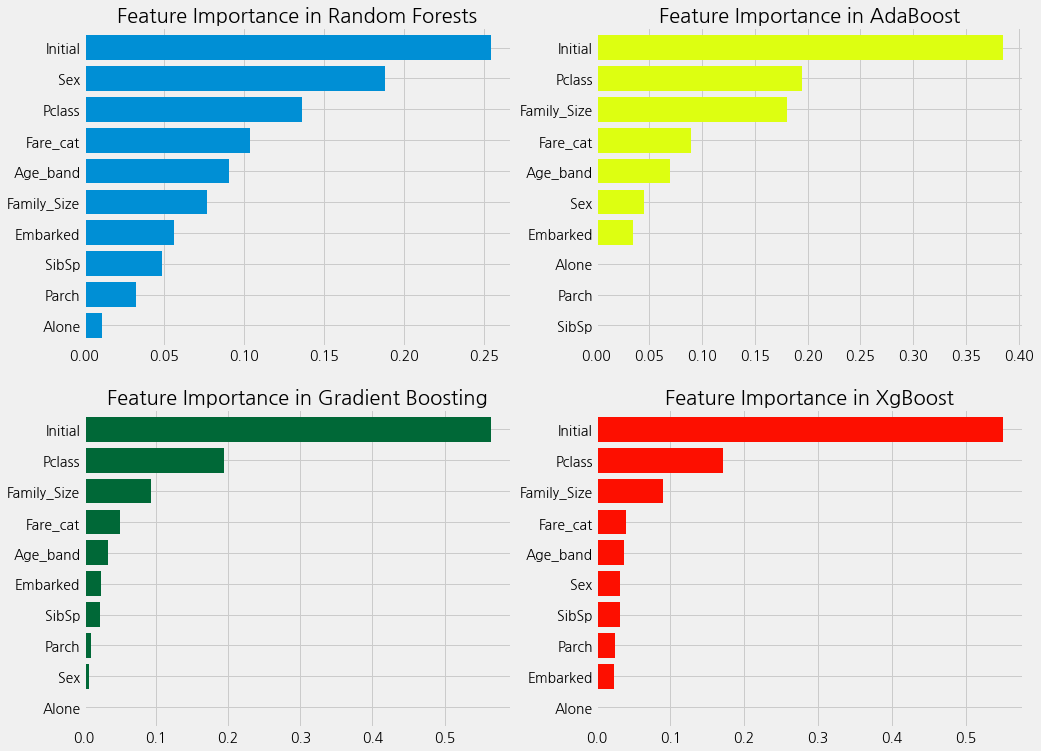

In [134]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()